In [2]:
from math import sqrt

In [123]:
def calculate_distance_to_origin(review):
    reps = {}
    for token in review:
        if token in reps:
            reps[token] += 1
        else:
            reps[token] = 1
    
    sum = 0
    for token_quantity in reps.values():
        sum += token_quantity**2
    return sqrt(sum)
    

In [93]:
reviews = open("../data/imdb_tokenized.csv", 'r')

negative_distances_to_origin = []
positive_distances_to_origin = []
count = 0
for review in reviews:
    count += 1
    review = review.strip().split(',')
    tokens = review[3:]
    polarity = review[2]
    distance = calculate_distance_to_origin(tokens)
    if (polarity == "pos"):
        positive_distances_to_origin.append(distance)
    else:
        negative_distances_to_origin.append(distance)
    

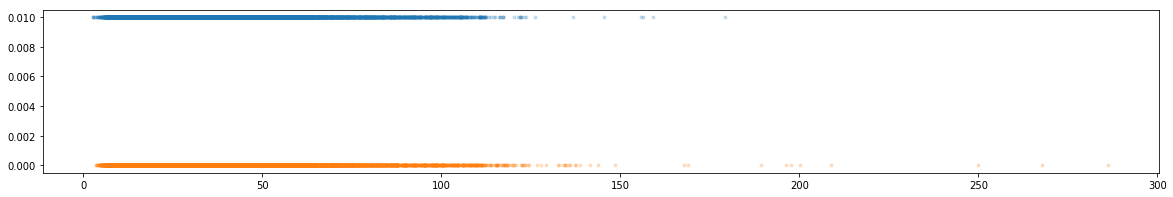

In [122]:
import numpy as np
import matplotlib.pyplot as pp
pp.figure(figsize=(20,3))
pp.plot(negative_distances_to_origin, np.zeros_like(negative_distances_to_origin)+0.01, '.',alpha=0.2) #mover alpha!
pp.plot(positive_distances_to_origin, np.zeros_like(positive_distances_to_origin), '.',alpha=0.2)      #mover alpha!
# pp.xlim(0, 25)
pp.show()